PROJECT TITLE: END TO END ANALYSIS ON GPUS 

Introduction

In this Project we will do end to end Data Analysis on GPU's which were released till 2025. This Data Set is Picked up from kaggle link is https://www.kaggle.com/datasets/alanjo/graphics-card-full-specs?resource=download&select=gpu_specs_v7.csv

KEY COLUMNS  
1. Manufacturer   
2. Release Year
3. Memory Size
4. Memory BusWidth
5. GPU CLOCK
6. MEMORY CLOCK  
7. UnifiedShader  
8. Tmu  
9. Rop  
10. PixelShader  
11. VertexShader 
12. Igp  
13. Bus  
14. Memory Type  
15. GPU Chip  

OUR OBJECTIVE IS TO ANSWER THE FOLLOWING QUESTIONS    


1.Which GPU manufacturer provides the highest average performance tier?   

2.How has GPU memory size (VRAM) changed over the years?     

3.What is the distribution of performance tiers across all GPUs?    

4.Which manufacturers dominate the high-performance segment?  

5.Which year had the most GPU launches?  

6.Are newer GPUs always better in terms of performance and memory?  

7.Which GPU chips are most commonly used across different manufacturers?  

  
IMPORTING LIB's

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


LOADING CSV

In [2]:
df=pd.read_csv("gpu_v7.csv")

BEFORE ANSWERING THE QUESTIONS WE WILL CLEAN IT 

PERFORMING EDA AND ETL

In [4]:
print(df.head())

  manufacturer              productName  releaseYear  memSize  memBusWidth  \
0       NVIDIA         GeForce RTX 5090       2025.0     28.0        448.0   
1       NVIDIA         GeForce RTX 5080       2025.0     16.0        256.0   
2       NVIDIA         GeForce RTX 5070       2025.0     12.0        192.0   
3       NVIDIA  GeForce RTX 5060 Mobile       2025.0      8.0        128.0   
4       NVIDIA         GeForce RTX 5060       2025.0      8.0        128.0   

   gpuClock  memClock  unifiedShader  tmu  rop  pixelShader  vertexShader igp  \
0       900    1200.0         8192.0  256  128          NaN           NaN  No   
1       900    1215.0         6912.0  432  192          NaN           NaN  No   
2      1825    2000.0         5120.0  320  128          NaN           NaN  No   
3      2235    2500.0         4608.0  144   48          NaN           NaN  No   
4      1825    2250.0         4608.0  288  192          NaN           NaN  No   

            bus memType       gpuChip  
0  P

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   3056 non-null   object 
 1   productName    3056 non-null   object 
 2   releaseYear    3012 non-null   float64
 3   memSize        2615 non-null   float64
 4   memBusWidth    188 non-null    float64
 5   gpuClock       3056 non-null   int64  
 6   memClock       2615 non-null   float64
 7   unifiedShader  2232 non-null   float64
 8   tmu            3056 non-null   int64  
 9   rop            3056 non-null   int64  
 10  pixelShader    824 non-null    float64
 11  vertexShader   824 non-null    float64
 12  igp            3056 non-null   object 
 13  bus            3056 non-null   object 
 14  memType        2615 non-null   object 
 15  gpuChip        3056 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 382.1+ KB
None


DROPING DUPLICATES AND CLEANING NAN VALUES

In [6]:
df=df.drop_duplicates(subset="productName")
df=df.dropna(axis=0,how="all")
df=df.dropna(axis=1,how="all")
df=df.fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2733 entries, 0 to 3055
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2733 non-null   object 
 1   productName    2733 non-null   object 
 2   releaseYear    2733 non-null   float64
 3   memSize        2733 non-null   float64
 4   memBusWidth    2733 non-null   float64
 5   gpuClock       2733 non-null   int64  
 6   memClock       2733 non-null   float64
 7   unifiedShader  2733 non-null   float64
 8   tmu            2733 non-null   int64  
 9   rop            2733 non-null   int64  
 10  pixelShader    2733 non-null   float64
 11  vertexShader   2733 non-null   float64
 12  igp            2733 non-null   object 
 13  bus            2733 non-null   object 
 14  memType        2733 non-null   object 
 15  gpuChip        2733 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 363.0+ KB
None


By above code we are able to remove any duplicates and nan columns/rows and filling them with 0

  


Q1.Which GPU manufacturer provides the highest average performance tier?

In [9]:
hap_mfgs=df.groupby("manufacturer")["memSize"].mean()
print(hap_mfgs)

manufacturer
3dfx      0.024933
AMD       5.224708
ATI       0.327767
Intel     4.802912
Matrox    0.117742
NVIDIA    5.020683
Sony      0.016667
XGI       0.217600
Name: memSize, dtype: float64


The above results clearly shows the the highest average performance is given by AMD GPU's based on VRAM size  

Plotting Visuals

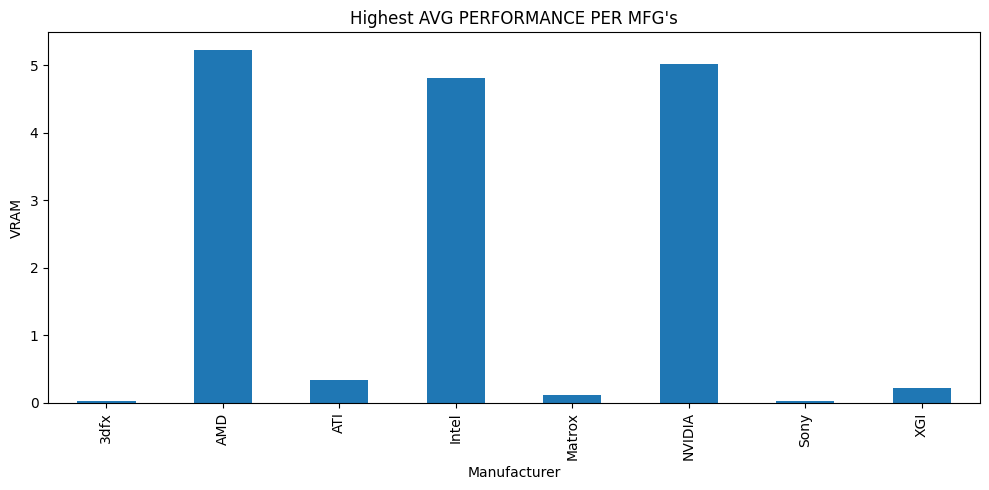

In [13]:
hap_mfgs.plot(kind="bar",figsize=(10,5))
plt.title("Highest AVG PERFORMANCE PER MFG's")
plt.xlabel("Manufacturer")
plt.ylabel("VRAM")
plt.tight_layout()
plt.show()

 

Q2.How has GPU memory size (VRAM) changed over the years?

In [15]:
nonzeroyears=df.query("releaseYear !=0")
gms_per_year=nonzeroyears.groupby("releaseYear")["memSize"].mean()
print(gms_per_year)

releaseYear
1986.0     0.000048
1987.0     0.000192
1988.0     0.000256
1990.0     0.000384
1992.0     0.001143
1993.0     0.001000
1994.0     0.001000
1995.0     0.001875
1996.0     0.002875
1997.0     0.004875
1998.0     0.013300
1999.0     0.019700
2000.0     0.037200
2001.0     0.048900
2002.0     0.073867
2003.0     0.122252
2004.0     0.152602
2005.0     0.226076
2006.0     0.273627
2007.0     0.356449
2008.0     0.596267
2009.0     0.746880
2010.0     1.037313
2011.0     1.408571
2012.0     1.673445
2013.0     2.266905
2014.0     2.760136
2015.0     3.172596
2016.0     5.451451
2017.0     5.763134
2018.0    10.200000
2019.0     6.660112
2020.0    10.417722
2021.0    14.894737
2022.0    12.466667
2023.0    23.958763
2024.0    28.380952
2025.0    13.333333
Name: memSize, dtype: float64


Plotting Bar Chart To conclude Results

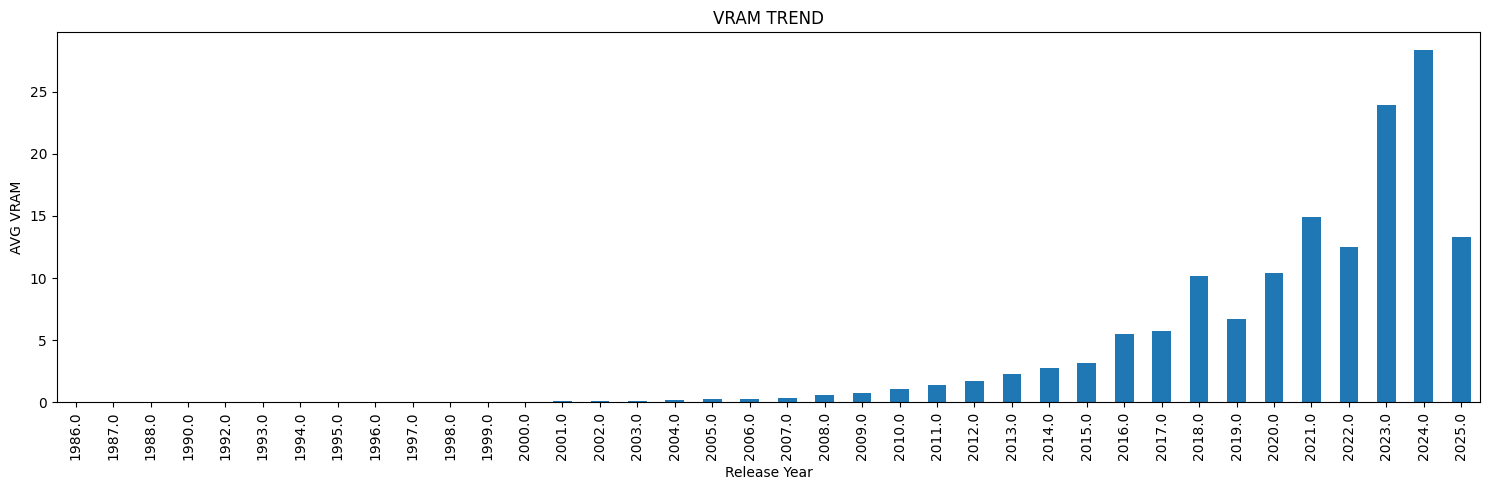

In [16]:
gms_per_year.plot(kind="bar",figsize=(15,5))
plt.title("VRAM TREND")
plt.xlabel("Release Year")
plt.ylabel("AVG VRAM")
plt.tight_layout()
plt.show()

The Above Bar Chart Clearly Shows That the rise of VRAM in each Year   
In 2024 massive VRAM GPU's Where released

Q3.What is the distribution of performance tiers across all GPUs?

For this We will use visuals 

In [18]:
df["Performance Tier"]=df["memSize"].apply(lambda x: "Display Card" if x<1 else("Entry Level" if x<=3 else("Mid End" if x<=6 else("High End" if x<=11 else("Ultra" if x<=16 else("Extreme" if x<=20 else "Elite"))))))

filtermemsize=df.query("memSize>=0.5")
pt_ms=filtermemsize.groupby(["memSize","Performance Tier"]).size()
print(pt_ms)

memSize  Performance Tier
0.512    Display Card        256
0.640    Display Card          2
0.768    Display Card          7
0.896    Display Card          7
1.024    Entry Level         344
1.280    Entry Level           7
1.536    Entry Level          26
1.792    Entry Level           3
2.000    Entry Level         299
2.500    Entry Level           2
3.000    Entry Level          42
3.750    Mid End               1
4.000    Mid End             214
5.000    Mid End               7
6.000    Mid End              73
8.000    High End            187
10.000   High End              8
11.000   High End              2
12.000   Ultra                46
16.000   Ultra                86
20.000   Extreme               5
24.000   Elite                25
28.000   Elite                 1
32.000   Elite                22
40.000   Elite                 3
48.000   Elite                13
64.000   Elite                 3
80.000   Elite                 9
96.000   Elite                 4
128.000  Elite   

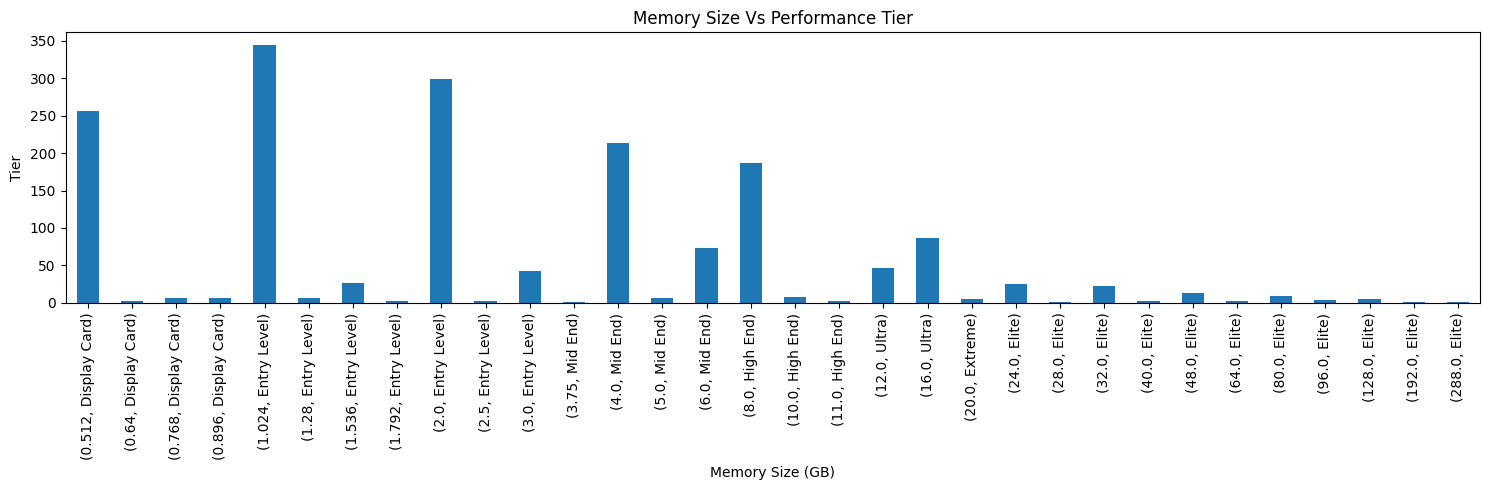

In [19]:
pt_ms.plot(kind="bar",figsize=(15,5))
plt.title("Memory Size Vs Performance Tier")
plt.xlabel("Memory Size (GB)")
plt.ylabel("Tier")
plt.tight_layout()
plt.show()

This Shows That the ELITE class GPUS are very less and non common while 1GB GPU where made in massive amount

Q4.Which manufacturers dominate the high-performance segment?

In [22]:
Highper_GPUS=df.query("memSize>=8 and memSize<=11")
Highper_GPUS_=Highper_GPUS.groupby("manufacturer")["memSize"].mean()
print(Highper_GPUS_)

manufacturer
AMD       8.068966
Intel     8.000000
NVIDIA    8.161616
Name: memSize, dtype: float64


The Above Results Shows that Nvidia Dominates in High Tier Performance i.e VRAM >=8Gb and <=11GB

Which year had the most GPU launches?

In [23]:
filternonzeros=df.query("releaseYear !=0")
gpu_per_year=filternonzeros.groupby("releaseYear").size()


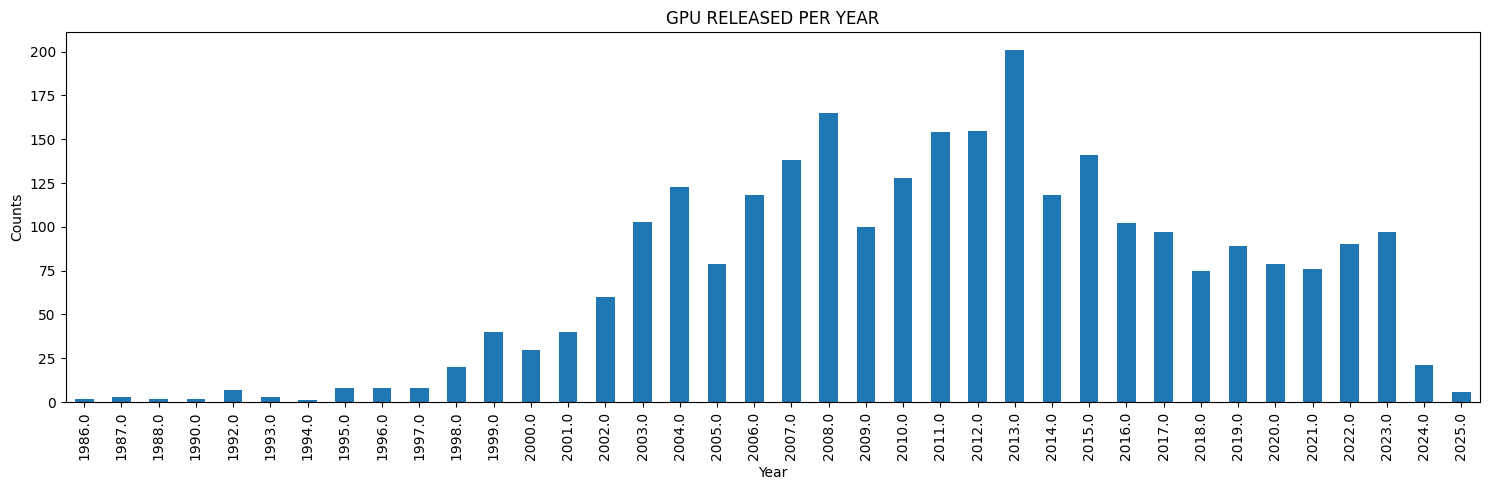

In [24]:
gpu_per_year.plot(kind="bar",figsize=(15,5))
plt.title("GPU RELEASED PER YEAR")
plt.xlabel("Year")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

The Above Results Clearly Shows That in Year 2013 massive amount of GPU's were released about 250+

Q6.Are newer GPUs always better in terms of performance and memory?

For this Purpose We will take GPU's with 5 Years Gap and Analyze it  

Starting From 2010-2015

In [25]:
GPUS_Till_2015=df.query("releaseYear >2009 and releaseYear<2016")
print(GPUS_Till_2015.head(5))

    manufacturer       productName  releaseYear  memSize  memBusWidth  \
816          AMD    Radeon R9 Nano       2015.0      4.0          0.0   
817          AMD  Radeon R9 FURY X       2015.0      4.0          0.0   
818          AMD    Radeon R9 FURY       2015.0      4.0          0.0   
819          AMD    Radeon R9 390X       2015.0      8.0          0.0   
820          AMD  Radeon R9 390 X2       2015.0      8.0          0.0   

     gpuClock  memClock  unifiedShader  tmu  rop  pixelShader  vertexShader  \
816      1557    1376.0         3200.0  200   80          0.0           0.0   
817      1900    2250.0         3072.0  192   96          0.0           0.0   
818      1830    2125.0         3072.0   96   48          0.0           0.0   
819      1620    2000.0         2816.0   88   48          0.0           0.0   
820      1000    1753.0         2816.0  176   96          0.0           0.0   

    igp           bus memType  gpuChip Performance Tier  
816  No  PCIe 3.0 x16  GDDR5

2015->2020

In [26]:
GPUS_Till_2020=df.query("releaseYear >2015 and releaseYear<2021")
print(GPUS_Till_2020.head(5))

    manufacturer      productName  releaseYear  memSize  memBusWidth  \
313       NVIDIA       GRID A100B       2020.0     48.0          0.0   
314       NVIDIA       GRID A100A       2020.0     48.0          0.0   
315       NVIDIA  A100 SXM4 80 GB       2020.0     80.0          0.0   
316       NVIDIA  A100 SXM4 40 GB       2020.0     40.0          0.0   
317       NVIDIA        A100 PCIe       2020.0     40.0          0.0   

     gpuClock  memClock  unifiedShader  tmu  rop  pixelShader  vertexShader  \
313      1303    1808.0         3840.0  240   96          0.0           0.0   
314      1025    1808.0         3840.0  240   96          0.0           0.0   
315       817    1500.0         3840.0  120   48          0.0           0.0   
316      1405    1426.0         3840.0  240   96          0.0           0.0   
317      1506    1127.0         3840.0  240   96          0.0           0.0   

    igp           bus memType gpuChip Performance Tier  
313  No  PCIe 3.0 x16  GDDR5X   GP1

2020->2025

In [27]:
GPUS_Till_2025=df.query("releaseYear >2020 and releaseYear<=2025")
print(GPUS_Till_2025.head(5))

  manufacturer              productName  releaseYear  memSize  memBusWidth  \
0       NVIDIA         GeForce RTX 5090       2025.0     28.0        448.0   
1       NVIDIA         GeForce RTX 5080       2025.0     16.0        256.0   
2       NVIDIA         GeForce RTX 5070       2025.0     12.0        192.0   
3       NVIDIA  GeForce RTX 5060 Mobile       2025.0      8.0        128.0   
4       NVIDIA         GeForce RTX 5060       2025.0      8.0        128.0   

   gpuClock  memClock  unifiedShader  tmu  rop  pixelShader  vertexShader igp  \
0       900    1200.0         8192.0  256  128          0.0           0.0  No   
1       900    1215.0         6912.0  432  192          0.0           0.0  No   
2      1825    2000.0         5120.0  320  128          0.0           0.0  No   
3      2235    2500.0         4608.0  144   48          0.0           0.0  No   
4      1825    2250.0         4608.0  288  192          0.0           0.0  No   

            bus memType       gpuChip Perfor

The Above results clearly Shows that gpus after 2020 are Better However the GPUS AFTER 2015 are also Good and Dominant

Q7.Which GPU chips are most commonly used across different manufacturers?

In [29]:
gchips_used_common_mfgs=df.groupby(["manufacturer","gpuChip"]).size().reset_index(name='Count')
most_common = gchips_used_common_mfgs.sort_values('Count', ascending=False).groupby('manufacturer').first().reset_index()

print(most_common)

  manufacturer       gpuChip  Count
0         3dfx         GF119     13
1          AMD         GK107     24
2          ATI         GF108     14
3        Intel         RV370      8
4       Matrox          R420      3
5       NVIDIA         GK104     29
6         Sony         TU104      2
7          XGI  Braswell GT1      2


The Above Results Shows that AMD AND NVIDIA uses GK108 most commonly

Insights Summary 

1. MOST GPU's WHERE RELEASED IN 2013  
2. INTEL IS IN THE GAME IN SHORT PERIOD OF TIME IT MANUFACTURED ALOT OF GPU's WITH HIGH SPECS 
3. AMD DOMINATED NVIDIA IN AVERAGE VRAM SIZE  
4. THE GPU VRAM ARE INCREASING EVERY YEAR REACHING UPTO 288GB VRAM SIZE   
5. MOSTLY GPU'S ARE ENTRY LEVEL I.E 1GB VRAM SIZE

ENDING  

This analysis gave a good overview of GPU market trends and architecture usage. Future work could involve price-performance analysis, or linking benchmark scores for deeper insight.